In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import os
import warnings
warnings.filterwarnings('ignore')

In [192]:
data = pd.read_csv("data_set.csv")
data.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [193]:
data.shape

(16148, 44)

In [194]:
data.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [196]:
data.isnull()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16144,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [197]:
data.isnull().sum()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [198]:
data.duplicated().any()

np.True_

In [199]:
duplicat_columns = data.duplicated()
data[duplicat_columns]

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
4153,1412.128910,920.473327,1414.160017,622.996586,22.248629,0.032454,2865.740741,0.062500,0.133391,1282.4385,...,13.418416,-6.713120,10.089062,-9.737516,10.000673,-3.583986,7.366380,-7.657676,8.581247,0
4156,1350.984280,697.583027,1405.091432,497.950051,21.674845,0.025402,2785.982572,0.086581,0.102512,1293.0490,...,13.047665,-6.953734,10.334755,-7.955184,7.243159,-6.843229,9.650276,-7.887499,9.204149,0
4159,1700.003436,1139.849988,1563.882152,591.271918,21.496923,0.024522,3284.975962,0.130687,0.115451,1374.5704,...,14.525292,-3.543442,7.883509,-13.231023,12.112495,-2.378820,7.745978,-11.122815,9.117839,0
4162,1603.435295,1098.400082,1504.251367,539.193703,22.398801,0.026613,3160.000000,0.102539,0.124267,1408.1073,...,16.980540,-6.776709,10.832165,-12.774789,9.733416,-3.940550,9.073194,-11.923497,8.665192,0
4165,2232.938291,1631.809654,1651.055700,612.490155,20.603783,0.047873,3923.056723,0.213629,0.101999,1615.0890,...,12.989914,-1.322290,11.655929,-8.510401,8.701939,1.662079,11.599171,-6.811781,7.187591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,1831.290901,1095.657669,1507.126905,441.370106,20.577582,0.023060,3381.093750,0.161582,0.063989,1519.1984,...,13.705769,2.318734,15.737608,-12.732199,9.730263,2.649397,10.108326,-13.013725,13.253206,1
16046,1674.069934,689.702062,1595.336488,350.695179,19.293286,0.032054,3384.114583,0.105499,0.077688,1682.6837,...,10.386293,-4.007985,17.626696,-5.365382,10.082510,4.642905,8.370355,-8.685815,10.766263,1
16053,1729.333727,924.972131,1511.611165,379.952701,19.899175,0.024843,3433.225236,0.123876,0.086999,1576.6437,...,10.382106,5.488963,16.886936,-16.970497,11.435887,6.402531,8.549980,-13.403180,10.182811,1
16060,2390.192041,1371.257338,1654.646816,447.120204,20.030245,0.037977,4174.310065,0.195306,0.074226,1775.7415,...,13.382373,5.654511,17.184233,-13.719124,9.047874,4.419389,8.628943,-6.299057,8.608444,1


In [200]:
data.duplicated().sum()

np.int64(1078)

In [201]:
data.drop_duplicates(inplace=True)

In [202]:
miss_columns = data.isnull().sum()

In [203]:
miss_columns[miss_columns>0]

Series([], dtype: int64)

In [204]:
data.columns

Index(['mean_spectral_centroid', 'std_spectral_centroid',
       'mean_spectral_bandwidth', 'std_spectral_bandwidth',
       'mean_spectral_contrast', 'mean_spectral_flatness',
       'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
       'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew',
       'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean',
       'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std',
       'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean',
       'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
       'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
       'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
       'mfcc_13_mean', 'mfcc_13_std', 'label'],
      dtype='object')

In [205]:
cat_columns = [feature for feature in data.columns if data[feature].dtype == "O"]
cat_columns

[]

In [206]:
num_columns = [feature for feature in data.columns if data[feature].dtype != "O"]
num_columns

['mean_spectral_centroid',
 'std_spectral_centroid',
 'mean_spectral_bandwidth',
 'std_spectral_bandwidth',
 'mean_spectral_contrast',
 'mean_spectral_flatness',
 'mean_spectral_rolloff',
 'zero_crossing_rate',
 'rms_energy',
 'mean_pitch',
 'min_pitch',
 'max_pitch',
 'std_pitch',
 'spectral_skew',
 'spectral_kurtosis',
 'energy_entropy',
 'log_energy',
 'mfcc_1_mean',
 'mfcc_1_std',
 'mfcc_2_mean',
 'mfcc_2_std',
 'mfcc_3_mean',
 'mfcc_3_std',
 'mfcc_4_mean',
 'mfcc_4_std',
 'mfcc_5_mean',
 'mfcc_5_std',
 'mfcc_6_mean',
 'mfcc_6_std',
 'mfcc_7_mean',
 'mfcc_7_std',
 'mfcc_8_mean',
 'mfcc_8_std',
 'mfcc_9_mean',
 'mfcc_9_std',
 'mfcc_10_mean',
 'mfcc_10_std',
 'mfcc_11_mean',
 'mfcc_11_std',
 'mfcc_12_mean',
 'mfcc_12_std',
 'mfcc_13_mean',
 'mfcc_13_std',
 'label']

In [207]:
len(num_columns)

44

In [208]:
data.shape

(15070, 44)

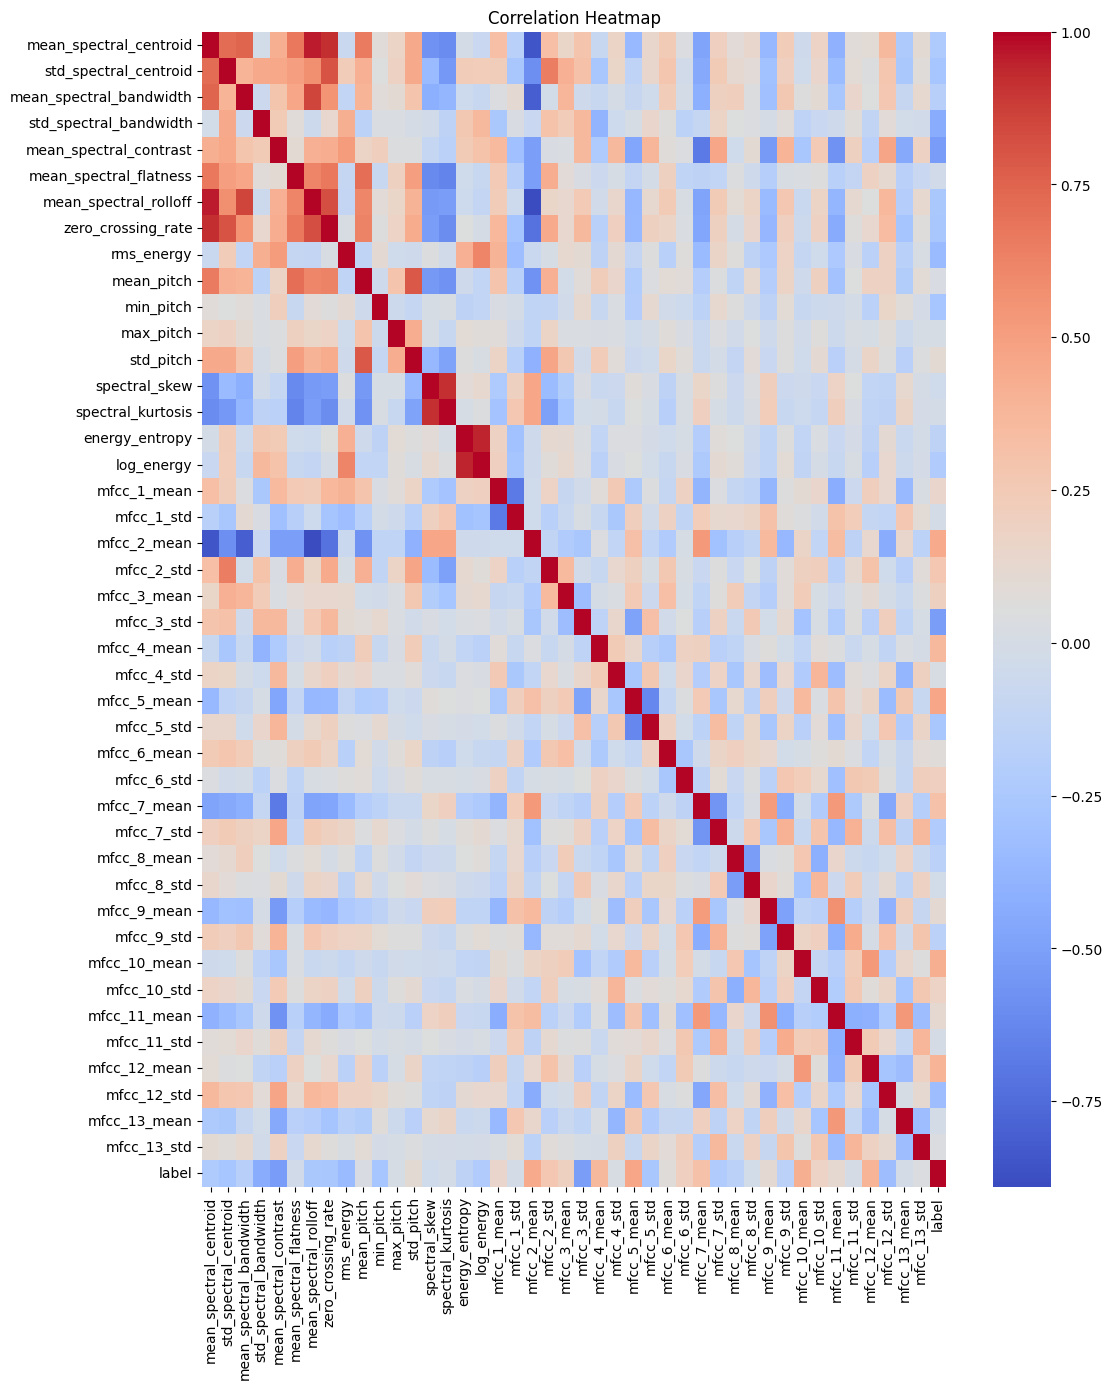

In [209]:
plt.figure(figsize=(12, 15))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

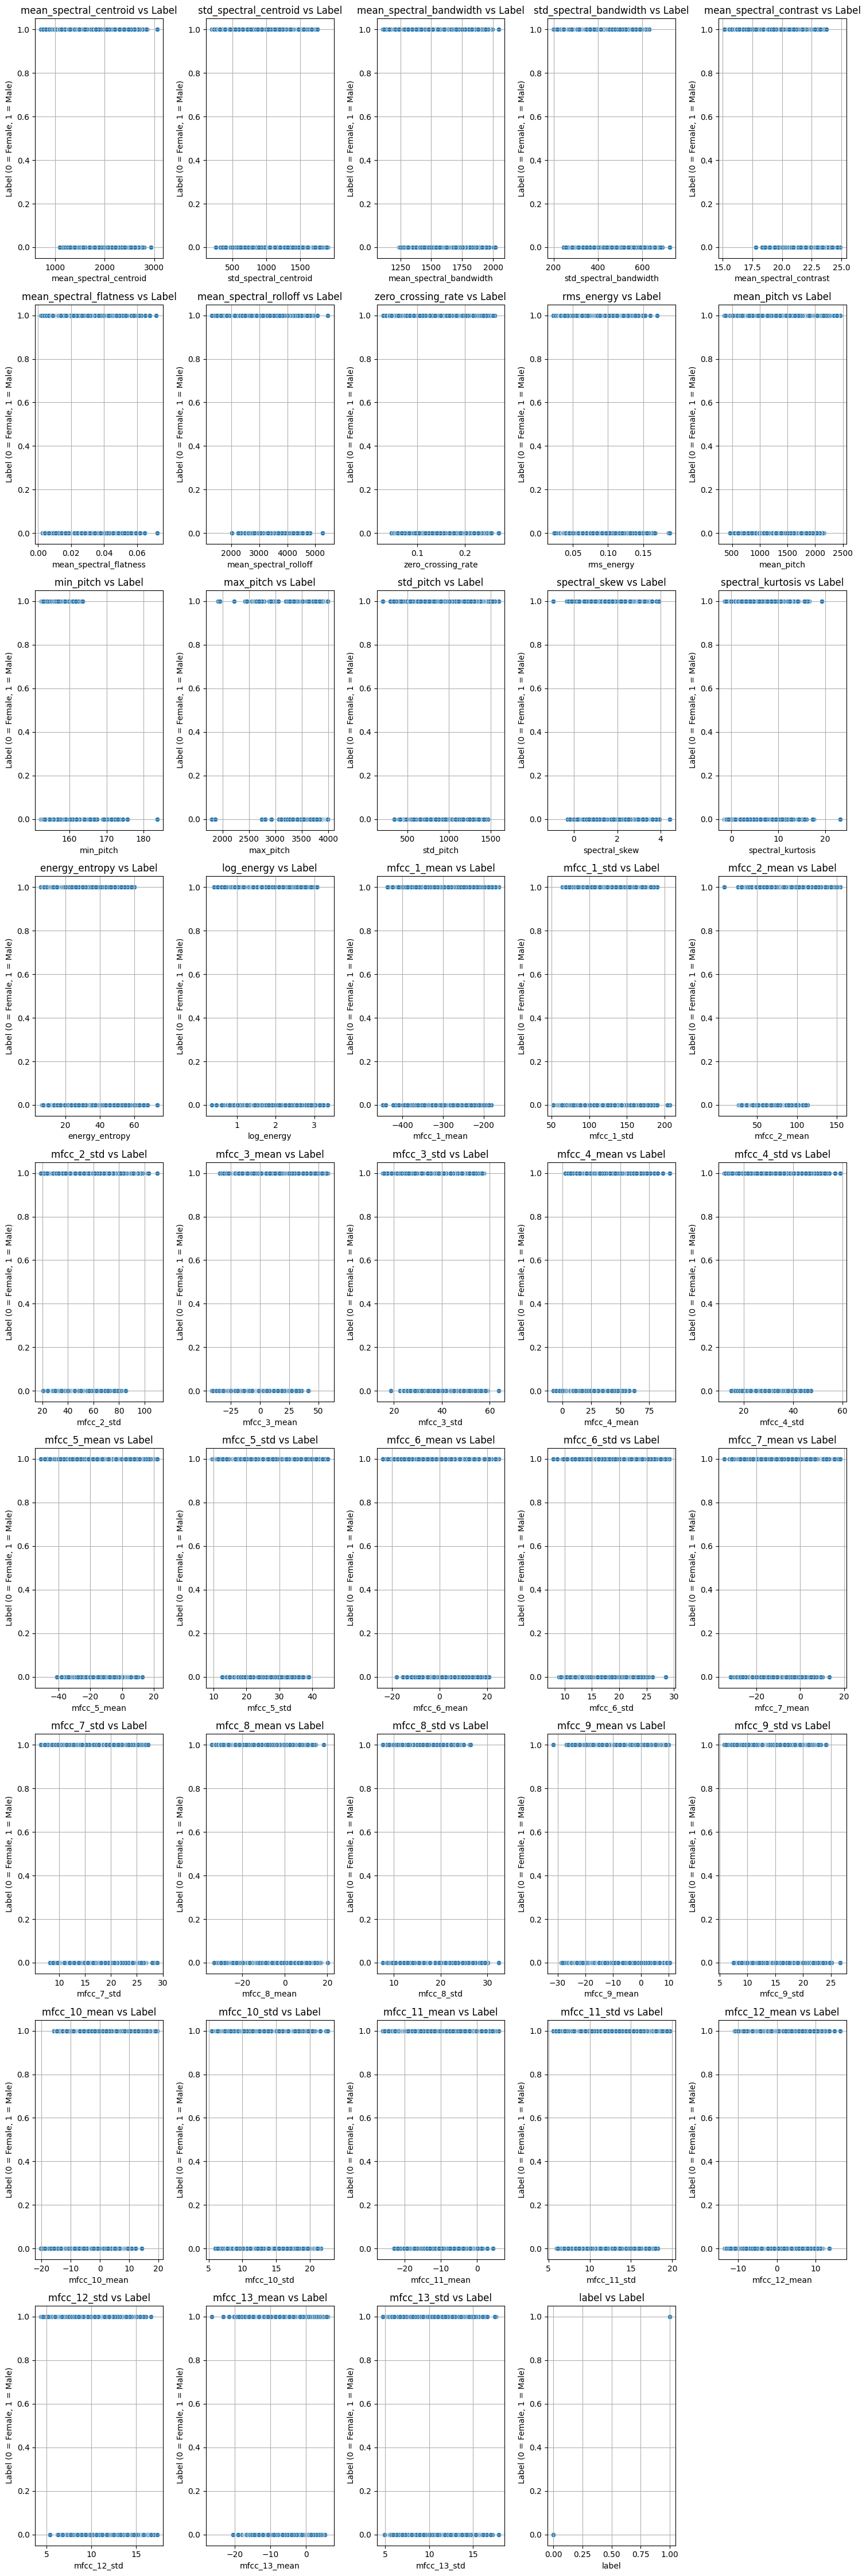

In [210]:
n_cols = 5 
n_rows = (len(num_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for idx, column in enumerate(num_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(data=data, x=column, y="label")
    plt.title(f'{column} vs Label')
    plt.xlabel(column)
    plt.ylabel('Label (0 = Female, 1 = Male)')
    plt.grid(True)
plt.tight_layout()
plt.show()    

In [211]:
data.corr()["label"]

mean_spectral_centroid    -0.229683
std_spectral_centroid     -0.271052
mean_spectral_bandwidth   -0.181404
std_spectral_bandwidth    -0.432073
mean_spectral_contrast    -0.523588
mean_spectral_flatness    -0.027926
mean_spectral_rolloff     -0.249336
zero_crossing_rate        -0.257836
rms_energy                -0.348453
mean_pitch                 0.019928
min_pitch                 -0.274591
max_pitch                  0.006378
std_pitch                  0.102551
spectral_skew             -0.036528
spectral_kurtosis         -0.012169
energy_entropy            -0.145792
log_energy                -0.218610
mfcc_1_mean                0.150729
mfcc_1_std                -0.016557
mfcc_2_mean                0.444837
mfcc_2_std                 0.273513
mfcc_3_mean                0.199473
mfcc_3_std                -0.515623
mfcc_4_mean                0.360128
mfcc_4_std                 0.011428
mfcc_5_mean                0.466618
mfcc_5_std                -0.269149
mfcc_6_mean                0

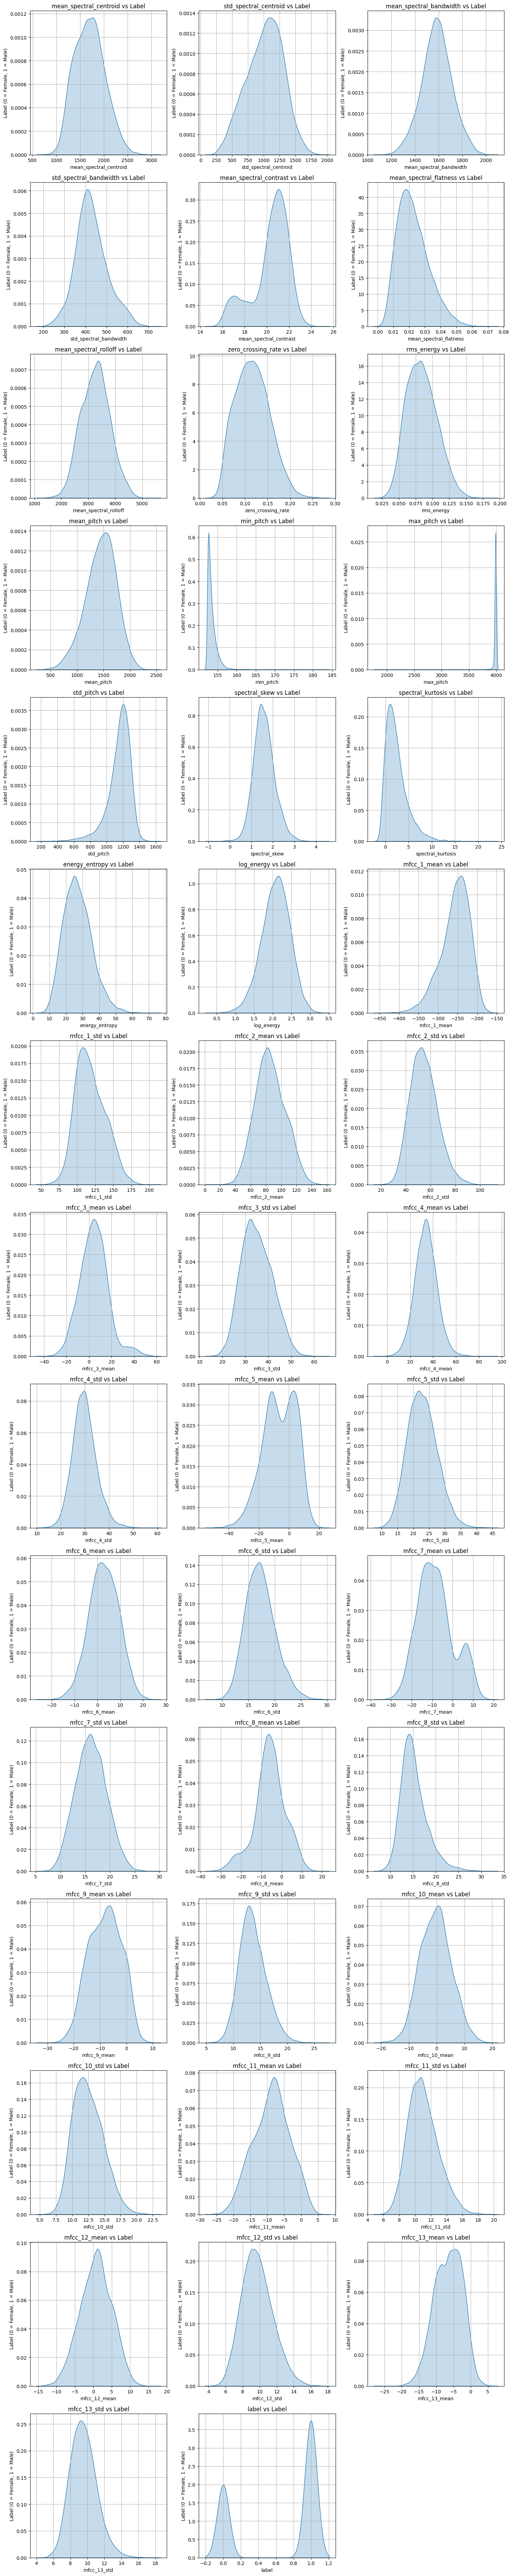

In [212]:
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for idx, column in enumerate(num_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.kdeplot(data=data, x=column, fill=True)
    plt.title(f'{column} vs Label')
    plt.xlabel(column)
    plt.ylabel('Label (0 = Female, 1 = Male)')
    plt.grid(True)
plt.tight_layout()
plt.show()  

In [213]:
skewness = data[num_columns].skew()
columns_to_transform = skewness[abs(skewness) > 1].index.tolist()


In [214]:
skewness = data[num_columns].skew()
for col in num_columns:
    print(f"{col} : {skewness[col]:.4f}")

mean_spectral_centroid : 0.2369
std_spectral_centroid : -0.1888
mean_spectral_bandwidth : -0.0308
std_spectral_bandwidth : 0.3778
mean_spectral_contrast : -0.8996
mean_spectral_flatness : 0.7213
mean_spectral_rolloff : 0.0412
zero_crossing_rate : 0.3277
rms_energy : 0.3288
mean_pitch : -0.3332
min_pitch : 4.8787
max_pitch : -13.4004
std_pitch : -1.4341
spectral_skew : 0.3141
spectral_kurtosis : 1.4780
energy_entropy : 0.5185
log_energy : -0.2716
mfcc_1_mean : -0.7382
mfcc_1_std : 0.3642
mfcc_2_mean : 0.1676
mfcc_2_std : 0.3933
mfcc_3_mean : 0.4061
mfcc_3_std : 0.2647
mfcc_4_mean : 0.1589
mfcc_4_std : 0.4189
mfcc_5_mean : -0.3550
mfcc_5_std : 0.3225
mfcc_6_mean : -0.0872
mfcc_6_std : 0.4112
mfcc_7_mean : 0.3632
mfcc_7_std : 0.1274
mfcc_8_mean : -0.3258
mfcc_8_std : 0.9891
mfcc_9_mean : -0.1097
mfcc_9_std : 0.4346
mfcc_10_mean : 0.0612
mfcc_10_std : 0.4258
mfcc_11_mean : -0.1252
mfcc_11_std : 0.4826
mfcc_12_mean : -0.0868
mfcc_12_std : 0.3724
mfcc_13_mean : -0.2392
mfcc_13_std : 0.4682
l

In [215]:
threshold = 1.0
columns_to_transform = skewness[abs(skewness) > threshold].index.tolist()
print("\nColumns recommended for power transformation (|skewness| > 1):")
print(columns_to_transform)


Columns recommended for power transformation (|skewness| > 1):
['min_pitch', 'max_pitch', 'std_pitch', 'spectral_kurtosis']


In [216]:
### Columns recommended for power transformation (|skewness| > 1):


## ['min_pitch', 'max_pitch', 'std_pitch', 'spectral_kurtosis']

In [217]:
if columns_to_transform:
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    data[columns_to_transform] = pt.fit_transform(data[columns_to_transform])

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [219]:
X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
feature_names = X.columns

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [220]:
print("Top 10 Features by Random Forest Importance:")
print(importance_df.head(15))

Top 10 Features by Random Forest Importance:
                   Feature  Importance
25             mfcc_5_mean    0.139969
22              mfcc_3_std    0.087954
4   mean_spectral_contrast    0.086951
19             mfcc_2_mean    0.076704
3   std_spectral_bandwidth    0.053280
39            mfcc_12_mean    0.045346
17             mfcc_1_mean    0.043689
35            mfcc_10_mean    0.031750
8               rms_energy    0.031713
20              mfcc_2_std    0.031138
36             mfcc_10_std    0.030773
23             mfcc_4_mean    0.027904
27             mfcc_6_mean    0.025705
31             mfcc_8_mean    0.022507
41            mfcc_13_mean    0.021025


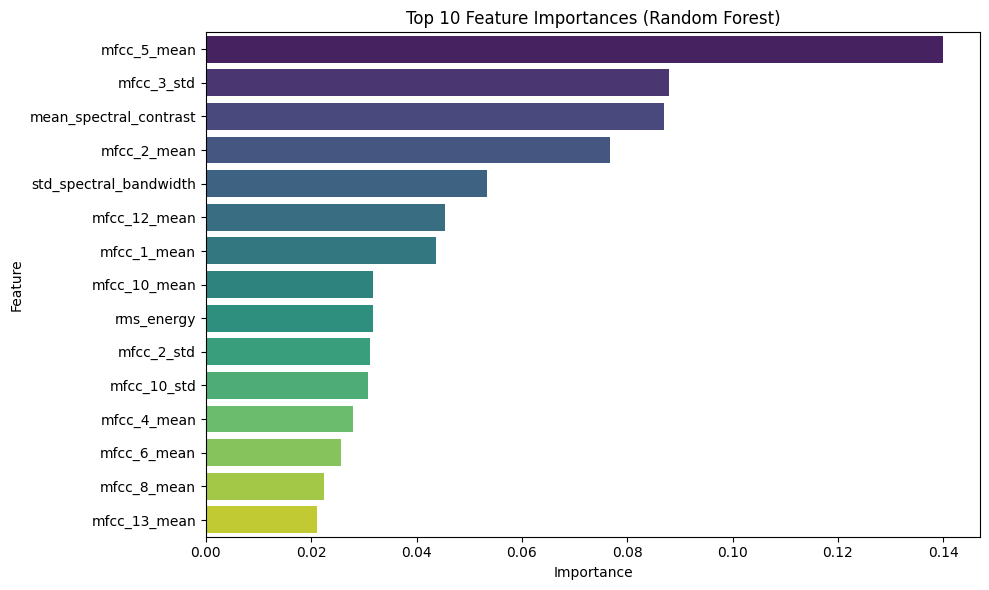

In [221]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [222]:
top_features = importance_df['Feature'].head(15).tolist()
X_selected = X[top_features]

In [223]:
X_scaled_selected = scaler.fit_transform(X_selected)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y, test_size=0.3, random_state=42)

In [225]:
results = {}

In [226]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
prd = rf.predict(X_test)
accuracy_score(y_test,prd)
results['-------RandomForest-------'] = {
        'Val_Accuracy': accuracy_score(y_test,prd),
        'Val_Precision': precision_score(y_test,prd),
        'Val_Recall': recall_score(y_test,prd),
        'Val_F1': f1_score(y_test,prd),
        'Test_Accuracy': accuracy_score(y_test,prd),
        'Test_Precision': precision_score(y_test,prd),
        'Test_Recall': recall_score(y_test,prd),
        'Test_F1': f1_score(y_test,prd)
    }


In [227]:
nn = MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn_val = nn.predict(X_test)
accuracy_score(y_test, y_pred_nn_val)
results['-------NeuralNetwork-------'] = {
        'Val_Accuracy': accuracy_score(y_test, y_pred_nn_val),
        'Val_Precision': precision_score(y_test, y_pred_nn_val),
        'Val_Recall': recall_score(y_test, y_pred_nn_val),
        'Val_F1': f1_score(y_test, y_pred_nn_val)
    }

In [228]:
results

{'-------RandomForest-------': {'Val_Accuracy': 0.9918159699181597,
  'Val_Precision': 0.9915196743554953,
  'Val_Recall': 0.9959114139693356,
  'Val_F1': 0.9937106918238994,
  'Test_Accuracy': 0.9918159699181597,
  'Test_Precision': 0.9915196743554953,
  'Test_Recall': 0.9959114139693356,
  'Test_F1': 0.9937106918238994},
 '-------NeuralNetwork-------': {'Val_Accuracy': 0.9980092899800929,
  'Val_Precision': 0.9989768076398363,
  'Val_Recall': 0.9979557069846678,
  'Val_F1': 0.998465996250213}}

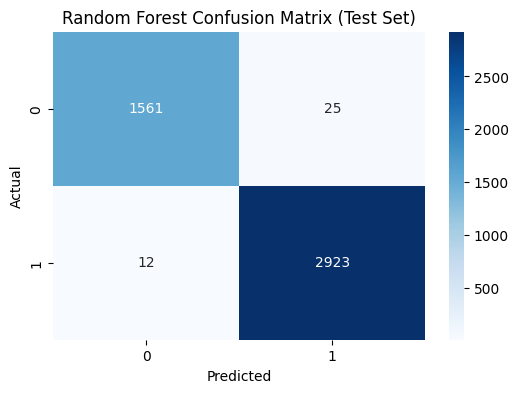

In [229]:
cm = confusion_matrix(y_test, prd)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

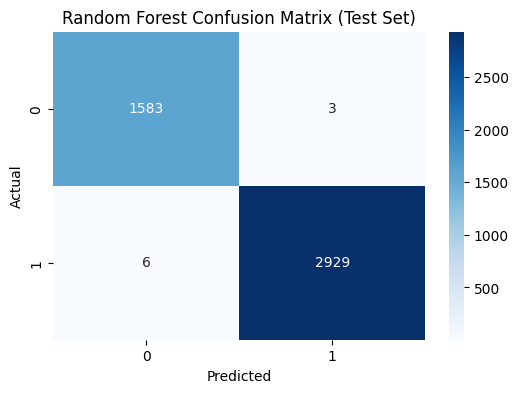

In [230]:
cm = confusion_matrix(y_test, y_pred_nn_val)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()